In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [30]:
# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/data/TSLA.csv')
features = df[['Open','High','Low','Close']].values
target = df['Adj Close'].values.reshape(-1,1)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [31]:
# 결측치 제거
df = df.dropna()

In [32]:
# 입력(X)과 타겟(y) 분리
X = df[['Open', 'High', 'Low', 'Close']].values
y = df['Adj Close'].values.reshape(-1, 1)

In [33]:
# -----------------------------
# 3. 시퀀스 생성
# -----------------------------
window = 8   # 데이터가 작아서 3개씩 시퀀스로 예시
X, y = [], []
for i in range(len(features)-window):
    X.append(features[i:i+window])
    y.append(target[i+window])
X, y = np.array(X), np.array(y)

In [34]:
# -----------------------------
# 4. 스케일링
# -----------------------------
n_samples, timesteps, n_features = X.shape
X_reshaped = X.reshape(-1, n_features)
scaler_X = MinMaxScaler(feature_range=(-1,1))
X_scaled = scaler_X.fit_transform(X_reshaped).reshape(n_samples, timesteps, n_features)

scaler_y = MinMaxScaler(feature_range=(-1,1))
y_scaled = scaler_y.fit_transform(y)


In [35]:
# -----------------------------
# 5. Train/Test 분리
# -----------------------------
split = int(len(X_scaled)*0.8)
X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y_scaled[:split], y_scaled[split:]

In [36]:
# -----------------------------
# 6. RNN 모델
# -----------------------------
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,n_features)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2358/2358 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0041
Epoch 2/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 1.4714e-04
Epoch 3/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 1.1903e-04
Epoch 4/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 9.9048e-05
Epoch 5/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 1.2690e-04
Epoch 6/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 6.4631e-05
Epoch 7/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 6.1455e-05
Epoch 8/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.0663e-05
Epoch 9/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 7.6810e-05
Epoch 10/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 6.1456e-05


In [37]:
# -----------------------------
# 7. LSTM 모델
# -----------------------------
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(window, n_features)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.0125
Epoch 2/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 9.8102e-05
Epoch 3/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 1.0088e-04
Epoch 4/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 7.5298e-05
Epoch 5/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 7.6647e-05
Epoch 6/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 8.1559e-05
Epoch 7/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 6.2989e-05
Epoch 8/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 6.4158e-05
Epoch 9/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 5.7811e-05
Epoch 10/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 5.0558e-05


In [38]:
# -----------------------------
# 8. 예측
# -----------------------------
rnn_pred  = rnn_model.predict(X_test)
lstm_pred  = lstm_model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# LSTM 성능
mse_lstm = mean_squared_error(y_test, lstm_pred)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, lstm_pred)
r2_lstm = r2_score(y_test, lstm_pred)

print("LSTM 성능")
print(f"MSE: {mse_lstm:.6f}")
print(f"RMSE: {rmse_lstm:.6f}")
print(f"MAE: {mae_lstm:.6f}")
print(f"R²: {r2_lstm:.4f}")

LSTM 성능
MSE: 0.024982
RMSE: 0.158058
MAE: 0.094169
R²: 0.9060


In [40]:
# RNN 성능
mse_rnn = mean_squared_error(y_test, rnn_pred)
rmse_rnn = np.sqrt(mse_rnn)
mae_rnn = mean_absolute_error(y_test, rnn_pred)
r2_rnn = r2_score(y_test, rnn_pred)

print("RNN 성능")
print(f"MSE: {mse_rnn:.6f}")
print(f"RMSE: {rmse_rnn:.6f}")
print(f"MAE: {mae_rnn:.6f}")
print(f"R²: {r2_rnn:.4f}")

RNN 성능
MSE: 0.010344
RMSE: 0.101707
MAE: 0.073502
R²: 0.9611


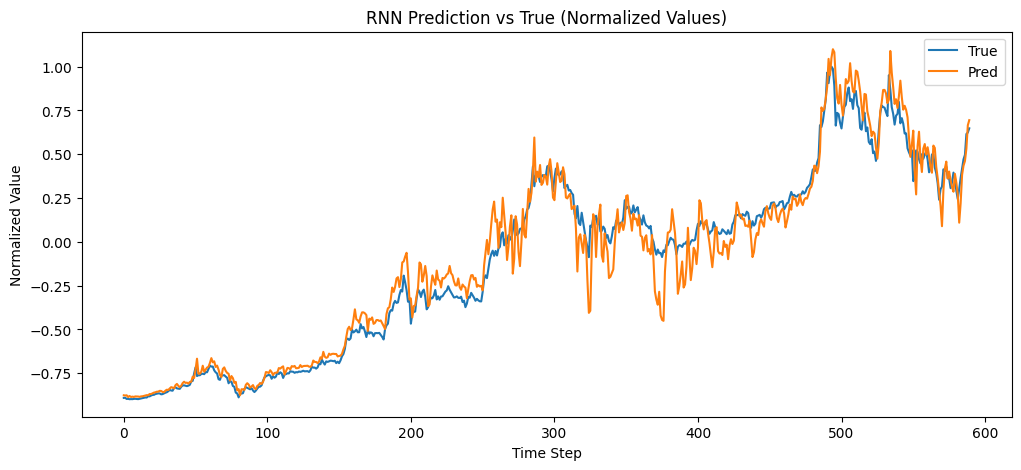

In [41]:
plt.figure(figsize=(12,5))
plt.plot(y_test, label='True')          # 테스트 실제값
plt.plot(rnn_pred, label='Pred')   # 테스트 예측값
plt.title('RNN Prediction vs True (Normalized Values)')
plt.xlabel('Time Step')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

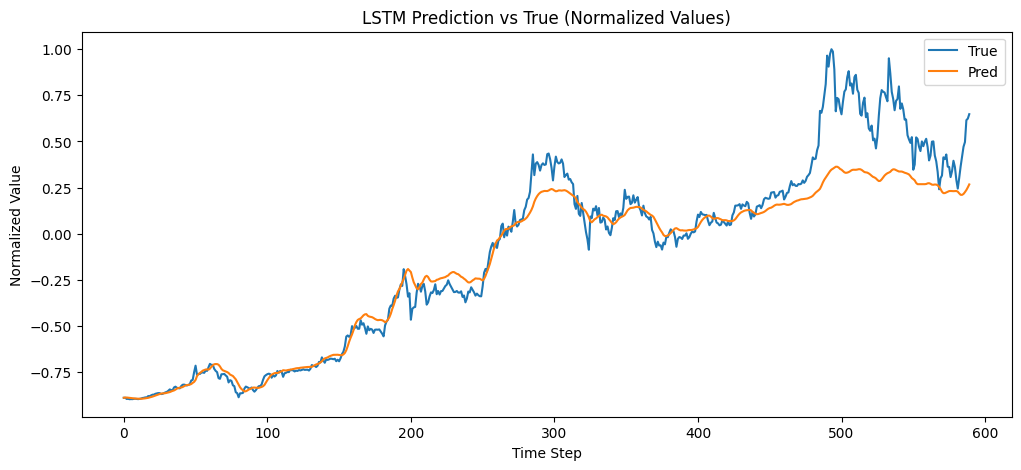

In [42]:
plt.figure(figsize=(12,5))
plt.plot(y_test, label='True')
plt.plot(lstm_pred, label='Pred')
plt.title('LSTM Prediction vs True (Normalized Values)')
plt.xlabel('Time Step')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()